In [4]:
from IPython.display import display
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, SimpleRNN, LSTM, GRU

import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

import plotly
import plotly.graph_objects as go
from pyod.models.knn import KNN

In [5]:
df = pd.read_csv('C:/Users/P5CD1/OneDrive/Documents/GitHub/DataScience_Discuss/DS_test/Raw_AllData_GT1.csv')
display(df)

,Name,GT SPEED,GT SPEED-1,GT SPEED-2,GT SPEED-3,ACTLD,GT GENERATOR POWER OUTPUT-1,GT GENERATOR POWER OUTPUT-2,SPSET,LDSET,...,GT GEN STATOR CORE TEMP #104 (S.R. SIDE),GT GEN STATOR CORE TEMP #105 (S.R. SIDE),GT GEN STATOR CORE TEMP #106 (S.R. SIDE),GENERATOR SEAL OIL TEMP.1,GENERATOR SEAL OIL DRAIN TEMP (S.R. SIDE),GENERATOR SEAL OIL DRAIN TEMP (TURB. SIDE),GENERATOR SEAL OIL DIFFERENTIAL PRESSURE,GENERATOR H2 GAS PURITY,GENERATOR H2 GAS PRESS,GENERATOR H2 GAS DEW POINT
0,2014/8/1 0:0:0,2998.1,2997.8,2997.8,2998.1,199.2,199.2,199.0,3.0,211.9,...,53.4,47.7,46.2,46.0,58.4,56.7,0.73,99.8,3.47,-29.0
1,2014/8/1 0:1:0,2997.4,2997.4,2997.4,2997.8,199.0,199.1,198.9,3.0,211.8,...,53.5,47.9,46.1,46.0,58.6,56.7,0.73,99.8,3.47,-29.0
2,2014/8/1 0:2:0,2999.6,2999.3,2998.9,2999.6,200.2,200.2,199.9,3.1,212.6,...,53.5,47.7,46.1,46.0,58.5,56.7,0.73,99.8,3.47,-29.0
3,2014/8/1 0:3:0,2997.4,2997.4,2997.0,2997.8,200.8,200.5,200.5,3.0,213.2,...,53.5,47.9,46.0,46.0,58.5,56.6,0.73,99.8,3.47,-29.0
4,2014/8/1 0:4:0,2996.6,2995.9,2996.3,2996.3,203.1,203.0,202.9,3.0,214.5,...,53.5,47.9,46.1,46.0,58.5,56.7,0.73,99.8,3.47,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2015/2/21 23:55:0,3000.0,3000.7,3000.0,3001.1,180.5,180.5,180.2,3.0,180.4,...,52.2,47.1,45.5,46.0,58.9,56.8,0.73,99.6,3.49,-25.6
129596,2015/2/21 23:56:0,2998.5,2998.1,2998.9,2998.1,180.5,180.5,180.4,3.0,180.4,...,52.2,47.0,45.6,46.0,58.9,56.8,0.72,99.6,3.49,-25.7
129597,2015/2/21 23:57:0,3001.5,3001.9,3001.9,3001.5,180.3,180.2,180.2,3.1,180.4,...,52.2,47.1,45.6,46.0,58.9,56.8,0.72,99.6,3.49,-25.7
129598,2015/2/21 23:58:0,3001.1,3000.7,3000.4,3001.1,180.3,180.3,179.9,3.1,180.4,...,52.3,47.1,45.6,46.0,58.9,56.8,0.72,99.6,3.49,-25.7


In [6]:
df_00 = df[['COMP INLET AIR TEMP','COMP OUTLET AIR TEMP','BAROMETRIC PRESS','COMB SHELL PRESS']]
display(df_00)

,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,BAROMETRIC PRESS,COMB SHELL PRESS
0,28.2,430.8,753.1,14.22
1,28.2,430.8,753.1,14.22
2,28.2,430.8,753.1,14.23
3,28.2,430.8,753.0,14.24
4,28.2,430.8,753.1,14.29
...,...,...,...,...
129595,28.0,419.7,752.7,13.51
129596,28.1,419.9,752.7,13.50
129597,28.1,420.0,752.7,13.51
129598,28.1,420.0,752.7,13.50


In [7]:
df_00['Comb_Shell_Press_coonvertMMH2o'] = (df_00['COMB SHELL PRESS'].values)*735.559
display(df_00)

C:\Users\P5CD1\AppData\Local\Temp\ipykernel_8016\416371937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00['Comb_Shell_Press_coonvertMMH2o'] = (df_00['COMB SHELL PRESS'].values)*735.559


,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,BAROMETRIC PRESS,COMB SHELL PRESS,Comb_Shell_Press_coonvertMMH2o
0,28.2,430.8,753.1,14.22,10459.64898
1,28.2,430.8,753.1,14.22,10459.64898
2,28.2,430.8,753.1,14.23,10467.00457
3,28.2,430.8,753.0,14.24,10474.36016
4,28.2,430.8,753.1,14.29,10511.13811
...,...,...,...,...,...
129595,28.0,419.7,752.7,13.51,9937.40209
129596,28.1,419.9,752.7,13.50,9930.04650
129597,28.1,420.0,752.7,13.51,9937.40209
129598,28.1,420.0,752.7,13.50,9930.04650


In [8]:
df_00['P2/P1 power G'] = (((df_00['Comb_Shell_Press_coonvertMMH2o'].values/(df_00['BAROMETRIC PRESS'].values))**(10.76/11.76))-1)
df_00['T2/T1'] = ((df_00['COMP OUTLET AIR TEMP'].values/df_00['COMP INLET AIR TEMP'].values)-1)
df_00['Efficiency Isentropic COMP'] = df_00['P2/P1 power G'].values/df_00['T2/T1'].values
df_00['Percent Eff Isentropic COMP'] = df_00['Efficiency Isentropic COMP'].values*100
display(df_00)

C:\Users\P5CD1\AppData\Local\Temp\ipykernel_8016\3026048998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00['P2/P1 power G'] = (((df_00['Comb_Shell_Press_coonvertMMH2o'].values/(df_00['BAROMETRIC PRESS'].values))**(10.76/11.76))-1)
C:\Users\P5CD1\AppData\Local\Temp\ipykernel_8016\3026048998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00['T2/T1'] = ((df_00['COMP OUTLET AIR TEMP'].values/df_00['COMP INLET AIR TEMP'].values)-1)
C:\Users\P5CD1\AppData\Local\Temp\ipykernel_8016\3026048998.py

,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,BAROMETRIC PRESS,COMB SHELL PRESS,Comb_Shell_Press_coonvertMMH2o,P2/P1 power G,T2/T1,Efficiency Isentropic COMP,Percent Eff Isentropic COMP
0,28.2,430.8,753.1,14.22,10459.64898,10.104503,14.276596,0.707767,70.776696
1,28.2,430.8,753.1,14.22,10459.64898,10.104503,14.276596,0.707767,70.776696
2,28.2,430.8,753.1,14.23,10467.00457,10.111648,14.276596,0.708267,70.826742
3,28.2,430.8,753.0,14.24,10474.36016,10.120143,14.276596,0.708862,70.886248
4,28.2,430.8,753.1,14.29,10511.13811,10.154508,14.276596,0.711270,71.126953
...,...,...,...,...,...,...,...,...,...
129595,28.0,419.7,752.7,13.51,9937.40209,9.601260,13.989286,0.686330,68.632956
129596,28.1,419.9,752.7,13.50,9930.04650,9.594080,13.943060,0.688090,68.808999
129597,28.1,420.0,752.7,13.51,9937.40209,9.601260,13.946619,0.688429,68.842923
129598,28.1,420.0,752.7,13.50,9930.04650,9.594080,13.946619,0.687914,68.791441


In [9]:
df_00['Delta_Eff_Isentropic'] = ""

for i in range(1, len(df_00)):
    df_00.loc[i, 'Delta_Eff_Isentropic'] = df_00.loc[i, 'Percent Eff Isentropic COMP'] - df_00.loc[i-1, 'Percent Eff Isentropic COMP']

display(df_00)

C:\Users\P5CD1\AppData\Local\Temp\ipykernel_8016\4253735283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00['Delta_Eff_Isentropic'] = ""


,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,BAROMETRIC PRESS,COMB SHELL PRESS,Comb_Shell_Press_coonvertMMH2o,P2/P1 power G,T2/T1,Efficiency Isentropic COMP,Percent Eff Isentropic COMP,Delta_Eff_Isentropic
0,28.2,430.8,753.1,14.22,10459.64898,10.104503,14.276596,0.707767,70.776696,
1,28.2,430.8,753.1,14.22,10459.64898,10.104503,14.276596,0.707767,70.776696,0.0
2,28.2,430.8,753.1,14.23,10467.00457,10.111648,14.276596,0.708267,70.826742,0.050046
3,28.2,430.8,753.0,14.24,10474.36016,10.120143,14.276596,0.708862,70.886248,0.059506
4,28.2,430.8,753.1,14.29,10511.13811,10.154508,14.276596,0.711270,71.126953,0.240706
...,...,...,...,...,...,...,...,...,...,...
129595,28.0,419.7,752.7,13.51,9937.40209,9.601260,13.989286,0.686330,68.632956,-0.115316
129596,28.1,419.9,752.7,13.50,9930.04650,9.594080,13.943060,0.688090,68.808999,0.176043
129597,28.1,420.0,752.7,13.51,9937.40209,9.601260,13.946619,0.688429,68.842923,0.033924
129598,28.1,420.0,752.7,13.50,9930.04650,9.594080,13.946619,0.687914,68.791441,-0.051482


In [10]:
df_00['Delta_Eff_Isentropic_Mov'] = df_00['Percent Eff Isentropic COMP'] - df_00.loc[0, 'Percent Eff Isentropic COMP']
df_00['Fouling COMP'] = np.where((df_00['Delta_Eff_Isentropic_Mov']<-2), 'Fouling', 'Not Fouling')
display(df_00)
df_00_countF = df_00['Fouling COMP'].value_counts()
print(df_00_countF)

C:\Users\P5CD1\AppData\Local\Temp\ipykernel_8016\509123908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00['Delta_Eff_Isentropic_Mov'] = df_00['Percent Eff Isentropic COMP'] - df_00.loc[0, 'Percent Eff Isentropic COMP']
C:\Users\P5CD1\AppData\Local\Temp\ipykernel_8016\509123908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00['Fouling COMP'] = np.where((df_00['Delta_Eff_Isentropic_Mov']<-2), 'Fouling', 'Not Fouling')


,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,BAROMETRIC PRESS,COMB SHELL PRESS,Comb_Shell_Press_coonvertMMH2o,P2/P1 power G,T2/T1,Efficiency Isentropic COMP,Percent Eff Isentropic COMP,Delta_Eff_Isentropic,Delta_Eff_Isentropic_Mov,Fouling COMP
0,28.2,430.8,753.1,14.22,10459.64898,10.104503,14.276596,0.707767,70.776696,,0.000000,Not Fouling
1,28.2,430.8,753.1,14.22,10459.64898,10.104503,14.276596,0.707767,70.776696,0.0,0.000000,Not Fouling
2,28.2,430.8,753.1,14.23,10467.00457,10.111648,14.276596,0.708267,70.826742,0.050046,0.050046,Not Fouling
3,28.2,430.8,753.0,14.24,10474.36016,10.120143,14.276596,0.708862,70.886248,0.059506,0.109552,Not Fouling
4,28.2,430.8,753.1,14.29,10511.13811,10.154508,14.276596,0.711270,71.126953,0.240706,0.350257,Not Fouling
...,...,...,...,...,...,...,...,...,...,...,...,...
129595,28.0,419.7,752.7,13.51,9937.40209,9.601260,13.989286,0.686330,68.632956,-0.115316,-2.143740,Fouling
129596,28.1,419.9,752.7,13.50,9930.04650,9.594080,13.943060,0.688090,68.808999,0.176043,-1.967697,Not Fouling
129597,28.1,420.0,752.7,13.51,9937.40209,9.601260,13.946619,0.688429,68.842923,0.033924,-1.933773,Not Fouling
129598,28.1,420.0,752.7,13.50,9930.04650,9.594080,13.946619,0.687914,68.791441,-0.051482,-1.985255,Not Fouling


Fouling        67235
Not Fouling    62365
Name: Fouling COMP, dtype: int64


In [11]:
df_00['Fouling COMP Num'] = np.where((df_00['Delta_Eff_Isentropic_Mov']<-2), 1, 0)
display(df_00)

C:\Users\P5CD1\AppData\Local\Temp\ipykernel_8016\639769650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00['Fouling COMP Num'] = np.where((df_00['Delta_Eff_Isentropic_Mov']<-2), 1, 0)


,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,BAROMETRIC PRESS,COMB SHELL PRESS,Comb_Shell_Press_coonvertMMH2o,P2/P1 power G,T2/T1,Efficiency Isentropic COMP,Percent Eff Isentropic COMP,Delta_Eff_Isentropic,Delta_Eff_Isentropic_Mov,Fouling COMP,Fouling COMP Num
0,28.2,430.8,753.1,14.22,10459.64898,10.104503,14.276596,0.707767,70.776696,,0.000000,Not Fouling,0
1,28.2,430.8,753.1,14.22,10459.64898,10.104503,14.276596,0.707767,70.776696,0.0,0.000000,Not Fouling,0
2,28.2,430.8,753.1,14.23,10467.00457,10.111648,14.276596,0.708267,70.826742,0.050046,0.050046,Not Fouling,0
3,28.2,430.8,753.0,14.24,10474.36016,10.120143,14.276596,0.708862,70.886248,0.059506,0.109552,Not Fouling,0
4,28.2,430.8,753.1,14.29,10511.13811,10.154508,14.276596,0.711270,71.126953,0.240706,0.350257,Not Fouling,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,28.0,419.7,752.7,13.51,9937.40209,9.601260,13.989286,0.686330,68.632956,-0.115316,-2.143740,Fouling,1
129596,28.1,419.9,752.7,13.50,9930.04650,9.594080,13.943060,0.688090,68.808999,0.176043,-1.967697,Not Fouling,0
129597,28.1,420.0,752.7,13.51,9937.40209,9.601260,13.946619,0.688429,68.842923,0.033924,-1.933773,Not Fouling,0
129598,28.1,420.0,752.7,13.50,9930.04650,9.594080,13.946619,0.687914,68.791441,-0.051482,-1.985255,Not Fouling,0


In [12]:
df['Fouling Cond'] = df_00['Fouling COMP Num']
display(df)

,Name,GT SPEED,GT SPEED-1,GT SPEED-2,GT SPEED-3,ACTLD,GT GENERATOR POWER OUTPUT-1,GT GENERATOR POWER OUTPUT-2,SPSET,LDSET,...,GT GEN STATOR CORE TEMP #105 (S.R. SIDE),GT GEN STATOR CORE TEMP #106 (S.R. SIDE),GENERATOR SEAL OIL TEMP.1,GENERATOR SEAL OIL DRAIN TEMP (S.R. SIDE),GENERATOR SEAL OIL DRAIN TEMP (TURB. SIDE),GENERATOR SEAL OIL DIFFERENTIAL PRESSURE,GENERATOR H2 GAS PURITY,GENERATOR H2 GAS PRESS,GENERATOR H2 GAS DEW POINT,Fouling Cond
0,2014/8/1 0:0:0,2998.1,2997.8,2997.8,2998.1,199.2,199.2,199.0,3.0,211.9,...,47.7,46.2,46.0,58.4,56.7,0.73,99.8,3.47,-29.0,0
1,2014/8/1 0:1:0,2997.4,2997.4,2997.4,2997.8,199.0,199.1,198.9,3.0,211.8,...,47.9,46.1,46.0,58.6,56.7,0.73,99.8,3.47,-29.0,0
2,2014/8/1 0:2:0,2999.6,2999.3,2998.9,2999.6,200.2,200.2,199.9,3.1,212.6,...,47.7,46.1,46.0,58.5,56.7,0.73,99.8,3.47,-29.0,0
3,2014/8/1 0:3:0,2997.4,2997.4,2997.0,2997.8,200.8,200.5,200.5,3.0,213.2,...,47.9,46.0,46.0,58.5,56.6,0.73,99.8,3.47,-29.0,0
4,2014/8/1 0:4:0,2996.6,2995.9,2996.3,2996.3,203.1,203.0,202.9,3.0,214.5,...,47.9,46.1,46.0,58.5,56.7,0.73,99.8,3.47,-29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2015/2/21 23:55:0,3000.0,3000.7,3000.0,3001.1,180.5,180.5,180.2,3.0,180.4,...,47.1,45.5,46.0,58.9,56.8,0.73,99.6,3.49,-25.6,1
129596,2015/2/21 23:56:0,2998.5,2998.1,2998.9,2998.1,180.5,180.5,180.4,3.0,180.4,...,47.0,45.6,46.0,58.9,56.8,0.72,99.6,3.49,-25.7,0
129597,2015/2/21 23:57:0,3001.5,3001.9,3001.9,3001.5,180.3,180.2,180.2,3.1,180.4,...,47.1,45.6,46.0,58.9,56.8,0.72,99.6,3.49,-25.7,0
129598,2015/2/21 23:58:0,3001.1,3000.7,3000.4,3001.1,180.3,180.3,179.9,3.1,180.4,...,47.1,45.6,46.0,58.9,56.8,0.72,99.6,3.49,-25.7,0


In [13]:
TargetVariable=['Fouling Cond']
Predictors=['GT SPEED', 'ACTLD','COMP INLET AIR TEMP', 'COMP OUTLET AIR TEMP', 'EXHAUST GAS DUCT PRESS','GT FUEL GAS FLOW (AFTER CORRECT)', 'FUEL GAS SUPPLY PRESS','EXHAUST GAS AVG TEMP(EXT)', 'No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X)', 'No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X)', 'No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X)', 'ROTOR COOLING AIR TEMP AVE.', 'LUBE OIL SUPPLY PRESS', 'LUBE OIL TEMP', 'INLET AIR FILTER DIFF PRESS']

X=df[Predictors].values
y=df[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=RobustScaler()
TargetVarScaler=RobustScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test.shape[1])

(116640, 15)
(116640, 1)
(12960, 15)
(12960, 1)
1


In [15]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
model.add(Dense(units=30, input_dim=15, kernel_initializer='normal', activation='relu'))
 
model.add(Dense(units=15, kernel_initializer='normal', activation='tanh'))
 
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train ,batch_size = 32, epochs = 128, verbose=1)

Epoch 1/128
3645/3645 [==============================] - 6s 1ms/step - loss: 0.0155
Epoch 2/128
3645/3645 [==============================] - 5s 1ms/step - loss: 0.0051
Epoch 3/128
3645/3645 [==============================] - 5s 1ms/step - loss: 0.0042
Epoch 4/128
3645/3645 [==============================] - 5s 1ms/step - loss: 0.0037
Epoch 5/128
3645/3645 [==============================] - 6s 2ms/step - loss: 0.0033
Epoch 6/128
3645/3645 [==============================] - 5s 2ms/step - loss: 0.0032
Epoch 7/128
3645/3645 [==============================] - 5s 1ms/step - loss: 0.0030
Epoch 8/128
3645/3645 [==============================] - 6s 2ms/step - loss: 0.0029
Epoch 9/128
3645/3645 [==============================] - 5s 1ms/step - loss: 0.0029
Epoch 10/128
3645/3645 [==============================] - 5s 1ms/step - loss: 0.0027
Epoch 11/128
3645/3645 [==============================] - 5s 1ms/step - loss: 0.0027
Epoch 12/128
3645/3645 [==============================] - 5s 1ms/step - lo

In [16]:
hist_df = pd.DataFrame(history.history) 


#save CSV
hist_csv_file = 'C:/Users/P5CD1/OneDrive/Documents/GitHub/DataScience_Discuss/DS_test/history_fouling_01.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [17]:
history_cnn = pd.read_csv('C:/Users/P5CD1/OneDrive/Documents/GitHub/DataScience_Discuss/DS_test/history_fouling_01.csv')
display(history_cnn)

,Unnamed: 0,loss
0,0,0.015451
1,1,0.005128
2,2,0.004247
3,3,0.003689
4,4,0.003332
...,...,...
123,123,0.001423
124,124,0.001477
125,125,0.001467
126,126,0.001469


dict_keys(['loss'])


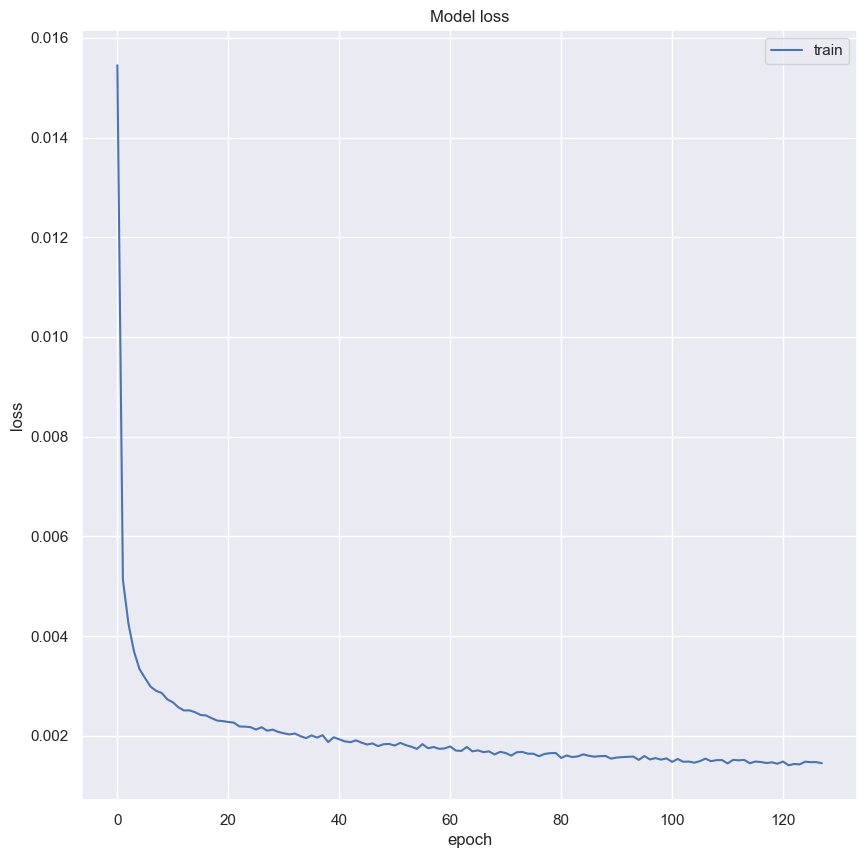

In [19]:
print(history.history.keys())

plt.rcParams['figure.figsize'] = [10, 10]
#  "Accuracy"
'''plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print('\n')'''
# "Loss"
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [20]:
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
#Predictions = abs(Predictions)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Fouling']=y_test_orig
TestingData['Predicted_Fouling']=Predictions
TestingData.head()

405/405 [==============================] - 1s 2ms/step


,GT SPEED,ACTLD,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,GT FUEL GAS FLOW (AFTER CORRECT),FUEL GAS SUPPLY PRESS,EXHAUST GAS AVG TEMP(EXT),No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X),No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X),No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X),ROTOR COOLING AIR TEMP AVE.,LUBE OIL SUPPLY PRESS,LUBE OIL TEMP,INLET AIR FILTER DIFF PRESS,Fouling,Predicted_Fouling
0,3001.9,238.9,27.4,451.7,306.6,64204.8,40.4,599.1,27.1,31.6,31.5,224.9,1.8,44.0,31.8,0.0,0.000618
1,2988.4,225.1,29.5,447.9,263.9,61229.5,40.0,608.7,38.3,28.1,43.8,225.3,1.8,44.0,58.3,0.0,0.000618
2,3004.9,238.9,28.8,452.8,308.3,63591.1,39.9,600.7,28.9,32.8,31.0,227.9,1.8,44.0,28.5,0.0,0.000618
3,2993.6,150.2,28.3,401.1,176.7,44521.6,40.7,560.3,25.0,34.4,28.1,215.8,1.8,44.0,20.3,1.0,1.003136
4,2998.5,180.5,24.8,409.3,224.9,49465.2,40.4,553.4,26.1,35.1,27.4,228.4,1.8,44.0,21.4,1.0,1.002597


In [21]:
#TestingData['Predicted anomaly'] = np.where(TestingData['Predicted anomaly']<0.5, 0,1)
TestingData['Predicted_Fouling'].mask(abs(TestingData['Predicted_Fouling']) < 0.5, 0, inplace=True)
TestingData['Predicted_Fouling'].mask(abs(TestingData['Predicted_Fouling']) > 0.5, 1, inplace=True)
TestingData.head()

,GT SPEED,ACTLD,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,GT FUEL GAS FLOW (AFTER CORRECT),FUEL GAS SUPPLY PRESS,EXHAUST GAS AVG TEMP(EXT),No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X),No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X),No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X),ROTOR COOLING AIR TEMP AVE.,LUBE OIL SUPPLY PRESS,LUBE OIL TEMP,INLET AIR FILTER DIFF PRESS,Fouling,Predicted_Fouling
0,3001.9,238.9,27.4,451.7,306.6,64204.8,40.4,599.1,27.1,31.6,31.5,224.9,1.8,44.0,31.8,0.0,0.0
1,2988.4,225.1,29.5,447.9,263.9,61229.5,40.0,608.7,38.3,28.1,43.8,225.3,1.8,44.0,58.3,0.0,0.0
2,3004.9,238.9,28.8,452.8,308.3,63591.1,39.9,600.7,28.9,32.8,31.0,227.9,1.8,44.0,28.5,0.0,0.0
3,2993.6,150.2,28.3,401.1,176.7,44521.6,40.7,560.3,25.0,34.4,28.1,215.8,1.8,44.0,20.3,1.0,1.0
4,2998.5,180.5,24.8,409.3,224.9,49465.2,40.4,553.4,26.1,35.1,27.4,228.4,1.8,44.0,21.4,1.0,1.0


In [22]:
predicted_value_1 = TestingData[(TestingData['Fouling'] == 1) & (TestingData['Predicted_Fouling'] == 0)]
display(predicted_value_1)
predicted_value_2 = TestingData[(TestingData['Fouling'] == 0) & (TestingData['Predicted_Fouling'] == 1)]
display(predicted_value_2)
print('Accuracy Data : ', ((TestingData.shape[0]-predicted_value_1.shape[0]-predicted_value_2.shape[0])/TestingData.shape[0])*100)

,GT SPEED,ACTLD,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,GT FUEL GAS FLOW (AFTER CORRECT),FUEL GAS SUPPLY PRESS,EXHAUST GAS AVG TEMP(EXT),No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X),No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X),No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X),ROTOR COOLING AIR TEMP AVE.,LUBE OIL SUPPLY PRESS,LUBE OIL TEMP,INLET AIR FILTER DIFF PRESS,Fouling,Predicted_Fouling
1113,2997.8,169.8,28.9,407.4,201.1,50858.7,40.3,561.4,25.4,37.4,28.1,223.8,1.80,44.1,19.7,1.0,0.0
2952,2998.9,201.2,27.3,429.3,233.2,54768.4,40.1,584.3,38.7,32.1,36.9,249.5,1.81,44.0,52.9,1.0,0.0
3729,3001.5,216.7,25.4,443.5,298.8,58192.3,40.2,561.8,27.7,31.2,27.6,221.0,1.81,44.0,30.3,1.0,0.0
4430,2995.5,216.3,25.5,444.7,293.4,58554.2,40.4,566.0,24.8,30.7,26.6,222.1,1.81,44.0,30.9,1.0,0.0
4522,3003.8,216.0,25.4,442.6,295.3,57952.3,40.1,559.5,28.0,30.9,27.6,220.8,1.80,44.0,30.4,1.0,0.0
5274,2998.5,243.7,24.9,449.0,314.4,64741.4,40.3,598.3,24.2,32.4,27.2,224.5,1.80,44.0,31.2,1.0,0.0
5745,3000.0,180.5,28.0,419.7,231.8,49512.5,40.6,555.1,24.6,33.3,26.6,237.6,1.81,44.0,24.3,1.0,0.0
6811,3007.1,190.6,27.9,422.7,230.8,53089.1,40.1,579.6,40.8,37.2,37.5,232.8,1.80,44.1,52.4,1.0,0.0
7211,3001.1,180.6,28.9,422.7,219.2,50607.4,40.3,577.9,39.3,31.2,40.9,242.6,1.81,44.0,50.2,1.0,0.0
8695,3003.8,241.1,25.0,449.6,312.5,64497.9,40.4,597.8,28.4,30.3,31.9,224.2,1.80,44.0,30.8,1.0,0.0


,GT SPEED,ACTLD,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,GT FUEL GAS FLOW (AFTER CORRECT),FUEL GAS SUPPLY PRESS,EXHAUST GAS AVG TEMP(EXT),No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X),No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X),No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X),ROTOR COOLING AIR TEMP AVE.,LUBE OIL SUPPLY PRESS,LUBE OIL TEMP,INLET AIR FILTER DIFF PRESS,Fouling,Predicted_Fouling
1552,3001.5,181.0,27.8,415.8,234.1,49389.8,40.4,551.1,26.1,36.7,27.0,236.6,1.81,44.0,23.7,0.0,1.0
2361,2998.5,169.7,29.3,416.4,212.9,47681.3,40.5,573.6,39.9,34.5,37.3,235.8,1.80,44.1,44.1,0.0,1.0
5109,3005.6,170.2,29.5,416.5,208.4,47738.7,40.4,572.8,39.6,35.4,36.1,237.2,1.81,43.9,43.3,0.0,1.0
5134,3005.3,176.3,28.3,413.9,220.4,48658.5,40.4,555.3,25.1,35.5,27.4,232.9,1.81,44.0,22.7,0.0,1.0
7262,2989.9,170.0,29.3,416.0,210.0,48092.2,40.4,574.5,39.8,33.9,37.3,235.6,1.80,44.0,43.6,0.0,1.0
10388,3002.6,171.3,29.4,416.9,209.8,48083.9,40.4,572.6,39.3,35.5,36.0,237.3,1.80,43.9,44.1,0.0,1.0
11318,2991.8,194.7,27.7,428.5,226.1,53439.0,40.2,586.6,38.9,31.6,36.0,250.5,1.80,44.0,47.4,0.0,1.0
12709,2994.0,202.1,27.2,429.2,230.2,56134.5,40.1,582.4,39.4,35.8,34.3,248.9,1.80,44.1,47.9,0.0,1.0


Accuracy Data :  99.77623456790124


In [23]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred_y = pred.argmax(axis=-1)

#cm = confusion_matrix(y_test, pred_y)
cm = confusion_matrix(TestingData['Fouling'], TestingData['Predicted_Fouling'])
print(cm)
cm

405/405 [==============================] - 1s 2ms/step
[[6223    8]
 [  21 6708]]


array([[6223,    8],
       [  21, 6708]], dtype=int64)

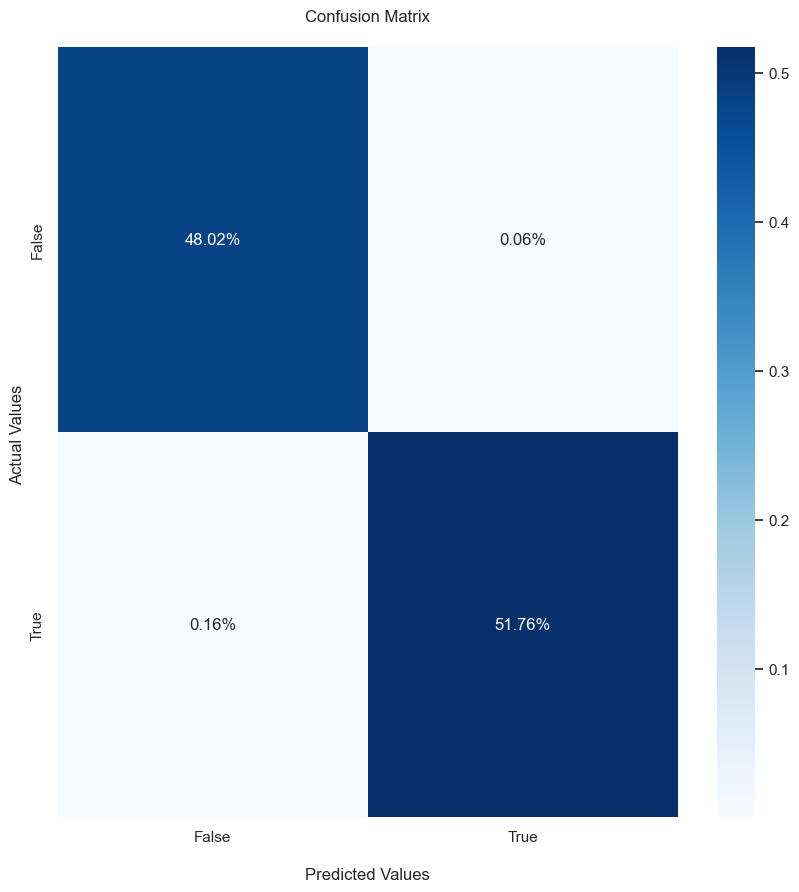

In [26]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [25]:
model.save('C:/Users/P5CD1/OneDrive/Documents/GitHub/DataScience_Discuss/DS_test/Model_Save')

INFO:tensorflow:Assets written to: C:/Users/P5CD1/OneDrive/Documents/GitHub/DataScience_Discuss/DS_test/Model_Save\assets
